In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_data_generator = ImageDataGenerator(rescale = 1./255, 
                               shear_range = 0.2, 
                               zoom_range = 0.2, 
                               horizontal_flip = True)

In [4]:
train_set = train_data_generator.flow_from_directory('train', 
                                             target_size = (32, 32), 
                                             batch_size = 16, 
                                             class_mode = 'binary')

Found 40 images belonging to 2 classes.


In [5]:
train_set.filenames[0]

'cats\\1.jpg'

In [6]:
img = tf.keras.preprocessing.image.load_img('train\\cats\\1.jpg')

In [7]:
import matplotlib.pyplot as plt

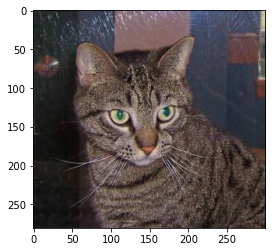

In [8]:
plt.imshow(img)

In [9]:
train_set.class_indices

{'cats': 0, 'dogs': 1}

In [10]:
test_data_generator = ImageDataGenerator(rescale = 1./255)

In [11]:
test_set = test_data_generator.flow_from_directory('test', 
                                                  target_size = (32,32), 
                                                  batch_size = 16,
                                                  class_mode = 'binary')

Found 20 images belonging to 2 classes.


In [12]:
 from tensorflow.keras.models import Sequential

In [13]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [14]:
model = Sequential()

# Convolutional layer 1 with 32 filters of kernel size[5,5] 

In [15]:
model.add(Conv2D(filters = 32, 
                kernel_size = [5,5], 
                activation = 'relu', 
                padding = 'valid', 
                input_shape = [32,32,3]))

# Pooling layer 1 with pool size[2,2] and stride 2  

In [16]:
model.add(MaxPool2D(pool_size = [2,2], 
                   strides = 2))

# Convolutional layer 2 with 64 filters of kernel size[5,5] 

In [17]:
model.add(Conv2D(filters = 64, 
                kernel_size = [5,5], 
                activation = 'relu', 
                padding = 'valid'))

#  Pooling layer 2 with pool size[2,2] and stride 2  

In [18]:
model.add(MaxPool2D(pool_size = [2,2],
                   strides = 2))

In [19]:
model.add(Flatten())

# Dense layer whose output size is fixed in the hyper parameter: fc_size=32 

In [20]:
model.add(Dense(units = 32, 
               activation = 'relu'))

# Dropout layer with dropout probability 0.4 

In [21]:
model.add(Dropout(0.40))

# Predict the class by doing a sigmoid on the output of the dropout layers. 

In [22]:
model.add(Dense(units = 1, 
               activation = 'sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 32)                5

#  For the training step, define the loss function and minimize it 

In [24]:
model.compile(optimizer = 'adam', 
             loss = 'binary_crossentropy', 
             metrics = ['accuracy'])

In [25]:
result1 = model.fit(train_set, validation_data = test_set, epochs = 100)

Epoch 1/100
3/3 [==============================] - 1s 144ms/step - loss: 0.7167 - accuracy: 0.5000 - val_loss: 0.6966 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 97ms/step - loss: 0.7379 - accuracy: 0.4250 - val_loss: 0.7006 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 82ms/step - loss: 0.7076 - accuracy: 0.5250 - val_loss: 0.6945 - val_accuracy: 0.4500
Epoch 4/100
3/3 [==============================] - 0s 92ms/step - loss: 0.7250 - accuracy: 0.3500 - val_loss: 0.7049 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 81ms/step - loss: 0.7066 - accuracy: 0.4500 - val_loss: 0.7000 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 106ms/step - loss: 0.6932 - accuracy: 0.4750 - val_loss: 0.6952 - val_accuracy: 0.5500
Epoch 7/100
3/3 [==============================] - 0s 90ms/step - loss: 0.6786 - accuracy: 0.5750 - val_loss: 0.6947 - val_accuracy: 0.4000
Epoch 8/100
3/3 [=

Epoch 59/100
3/3 [==============================] - 0s 88ms/step - loss: 0.1446 - accuracy: 1.0000 - val_loss: 0.5719 - val_accuracy: 0.8000
Epoch 60/100
3/3 [==============================] - 0s 109ms/step - loss: 0.1870 - accuracy: 0.9250 - val_loss: 0.5594 - val_accuracy: 0.6500
Epoch 61/100
3/3 [==============================] - 0s 88ms/step - loss: 0.1346 - accuracy: 0.9750 - val_loss: 0.6160 - val_accuracy: 0.7000
Epoch 62/100
3/3 [==============================] - 0s 88ms/step - loss: 0.1581 - accuracy: 0.9250 - val_loss: 0.5643 - val_accuracy: 0.7500
Epoch 63/100
3/3 [==============================] - 0s 91ms/step - loss: 0.1695 - accuracy: 0.9750 - val_loss: 0.6035 - val_accuracy: 0.7500
Epoch 64/100
3/3 [==============================] - 0s 97ms/step - loss: 0.1280 - accuracy: 1.0000 - val_loss: 0.6490 - val_accuracy: 0.6500
Epoch 65/100
3/3 [==============================] - 0s 108ms/step - loss: 0.1721 - accuracy: 0.9500 - val_loss: 0.6846 - val_accuracy: 0.7000
Epoch 66/10

In [ ]:
result2 = model.fit(train_set, validation_data = test_set, epochs = 200)

In [ ]:
result3 = model.fit(train_set, validation_data = test_set, epochs = 300)

In [26]:
import numpy as np

In [27]:
from tensorflow.keras.preprocessing import image

In [28]:
test_img = image.load_img('test/dogs/101.jpg',target_size = (32,32,3))

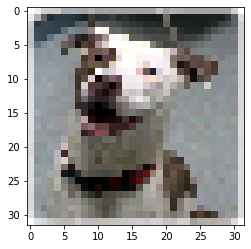

In [29]:
plt.imshow(test_img)

In [30]:
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)
test_img = test_img/255

In [31]:
result = model.predict(test_img)

In [32]:
result

array([[0.99978685]], dtype=float32)

In [33]:
if np.round(result[0][0]) == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog
